In [1]:
# ME17B158 - Omkar Nath

# Decision trees and random forests

Decision trees build classification or regression models in the form of a tree structure. Creating a binary decision tree is a process of dividing up the input space. A greedy and recursive approach is used to recursively create binary splits in the input space. At each step, all the values are lined up and different split points are tried and tested using a cost function. The split with the best cost (lowest cost because we minimize cost) is selected. All input variables and all possible split points are evaluated and chosen in a greedy manner as the optimal split point is chosen in each step without checking for whether or not the split will lead to the lowest possible cost several levels down. 

In order to make a prediction for a given observation, we typically use the mean (regression) or the mode (classification) of the training observations in the region to which the observation belongs. 

### A. Classification using decision trees

1. Import the make_moons dataset from sklearn using $100$ samples, noise $= 0.35$ and a fixed random state = $42$.
2. Fit and visualize a decision tree classifier. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importing Required Libraries
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
def plot_decision_boundary(tree, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [5]:
# Generating Data
X, y = make_moons(n_samples=100, noise=0.35, random_state=42)

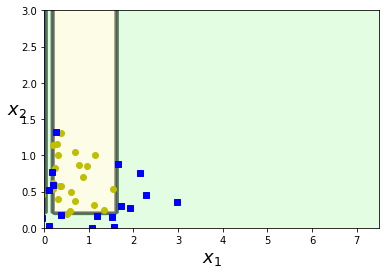

In [6]:
# Fitting and visualizing the Classifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X, y)
plot_decision_boundary(classifier, X, y)

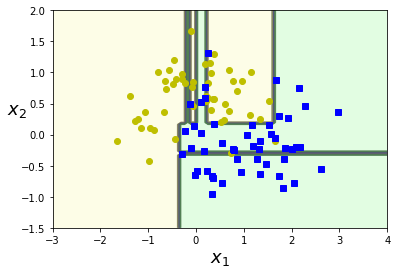

In [7]:
plot_decision_boundary(classifier, X, y, [-3, 4, -1.5, 2])

#### Q. Comment on the overfitting nature of the Decision trees

The model has generated some very odd decision boundaries, taking into account every single sample. This means that the model is highly overfit to the dataset.

### B. Overfitting in decision tree classifiers

1. List and explain in a few lines, three of the regularization hyperparameters used while building a decision tree and why they might help reduce overfitting of a decision tree model.
2. Now fit a decision tree classifier on the same dataset using the min_samples_leaf hyperparameter set to $4$. Plot the decision boundaries and compare with the model fit without any hyperparameters. Which model do you think will generalize better to the test dataset? 
3. Fit and visualize a decision tree classifier after setting the maximum depth of nodes as $5$. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. and compare with the model fit without any hyperparameters. Which model do you think will generalize better to the test dataset? 

##### Part 1
a) max_depth -> The maximum depth of the tree i.e. controls maximum levels that are present in the tree. Reducing the depth reduces the effective number of bifurcations in the tree, which can serve to help reduce the overfitting.
<br>
b) min_samples_leaf -> The minimum number of samples required to split an internal node. Restricting it helps to avoid overfitting the data.
<br>
c) max_leaf_nodes -> The maximum number of leaf nodes. The lower this hyperparameter is, the lesser number of end cases which can reduce overfitting.

##### Part 2

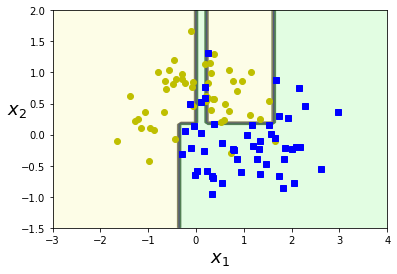

In [8]:
# Fitting and visualizing the Classifier
classifier = DecisionTreeClassifier(min_samples_leaf=4)
classifier = classifier.fit(X, y)
plot_decision_boundary(classifier, X, y, [-3, 4, -1.5, 2])

Comparing this to the case without hyperparameter tuning, this one would perform better on the test set as it is not overfitting the data.

##### Part 3

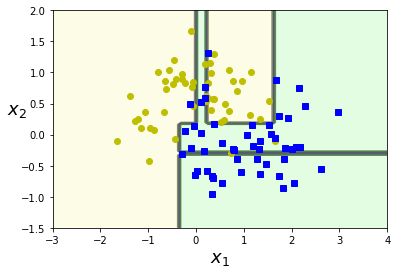

In [9]:
# Fitting and visualizing the Classifier
classifier = DecisionTreeClassifier(max_depth=5)
classifier = classifier.fit(X, y)
plot_decision_boundary(classifier, X, y, [-3, 4, -1.5, 2])

Comparing this to the case without hyperparameter tuning, this one where max depth is 5 might perform slightly better, as it may be slightly less overfit. However it still appears to be overfitting the data.

#### Q. Comment on the boundary surface of the decision tree. 
Hint: Observe the orthogonality of the boundary

##### Answer:
It would appear that the boundaries are always orthogonal. i.e. the decision tree simply seems to be creating a set of greater than or less than conditions on one of the variables, and idetifyiing which section (rectangle specifically) of the region does the point belong to, and classifying accordingly.

### C. Linear classifiers vs decision tree classifiers

In [10]:
#Generate 100 points [x1, x2] in the 2D plane using np.random.rand() for -0.5<x1<0.5 and -0.5<x2<0.5
x = np.random.rand(100,2) - 0.5
y = np.zeros(100)
#Assign a label of 1 to all points having x1>0.0 and 0 otherwise
y[x[:,0]>0] = 1
#Rotate the dataset by 45 degrees in the [x1,x2] plane
rot = [[0.414,-0.414],[0.414,0.414]]
x_rot = np.matmul(rot,x.T)
x_rot = x_rot.T

1. Fit a linear Logistic Regression model and Decision Tree on the x_rot
2. Fit a linear Logistic Regression model and Decision tree on the make_moons dataset generated in A(1)


##### Part 1: x_rot Data

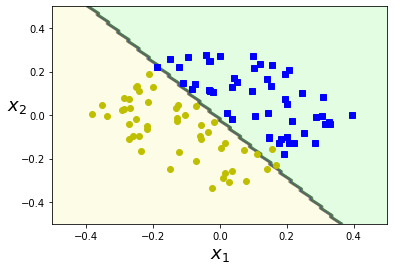

In [11]:
# Applying Logistic Regression
regressor = LogisticRegression()
regressor.fit(x_rot, y)

plot_decision_boundary(regressor, x_rot, y,[-0.5, 0.5, -0.5, 0.5])

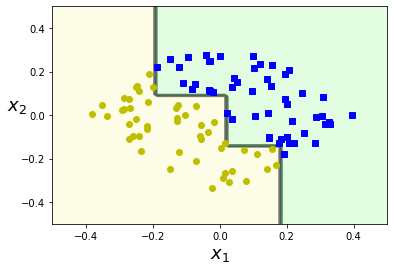

In [12]:
# Fitting Decision Tree
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_rot, y)

plot_decision_boundary(classifier, x_rot, y, [-0.5, 0.5, -0.5, 0.5])

##### Part 2: Moons Data

In [13]:
# Generating Data
X, y = make_moons(n_samples=100, noise=0.35, random_state=42)

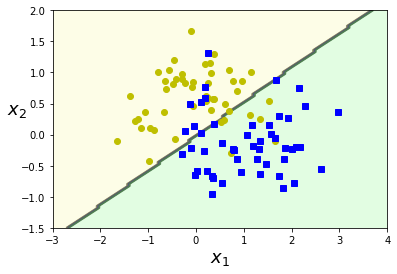

In [14]:
# Applying Logistic Regression
regressor = LogisticRegression()
regressor.fit(X, y)

plot_decision_boundary(regressor, X, y,[-3, 4, -1.5, 2])

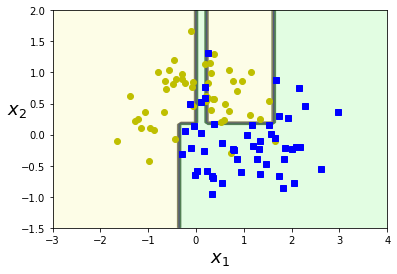

In [15]:
# Fitting Decision Tree
classifier = DecisionTreeClassifier(min_samples_leaf=4)
classifier = classifier.fit(X, y)

plot_decision_boundary(classifier, X, y, [-3, 4, -1.5, 2])

#### Q. Compare the performance of Decision Trees and logistic regression on the two datasets

For part 1 (x_rot data), logistic regression performs better. This is as the data is seprable by a linear but inclined boundary, which can be captured by logistic regression. For decision trees, the separating boundaries are parallel to the axis, making it difficult to capture an inclined boundary.
<br><br>
For part 2 (moons data), decision trees performs better. The data is not linearly separable, which means that it cannot be captured by logistic regression.

### D. Regression using decision trees

1. Train a regression tree on the noisy sine dataset given below with three different max_depth values : $2, 3$ and $4$.
2. Plot the divisions of the input space and the predicted value in each division of the input space using the helper function plot_regression_predictions provided to you below for each regression tree model in (1).

In [16]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

#Sine + noise training set 
np.random.seed(10)
X = np.random.rand(150, 1)
y = np.sin(2*np.pi*X) + np.random.randn(150, 1) / 10

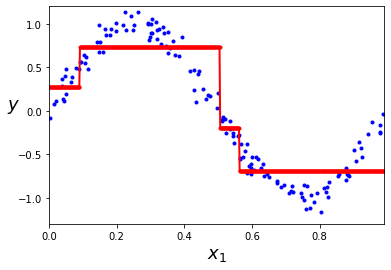

In [17]:
# Fitting Decision Tree with max depth 2
regressor = DecisionTreeRegressor(max_depth = 2)
regressor = regressor.fit(X, y)

plot_regression_predictions(regressor, X, y, [0, 0.99, -1.3, 1.2])

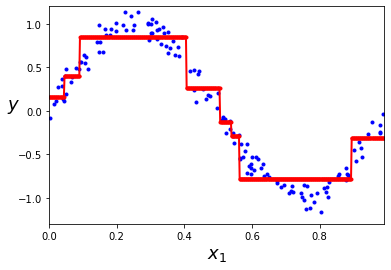

In [18]:
# Fitting Decision Tree with max depth 3
regressor = DecisionTreeRegressor(max_depth = 3)
regressor = regressor.fit(X, y)

plot_regression_predictions(regressor, X, y, [0, 0.99, -1.3, 1.2])

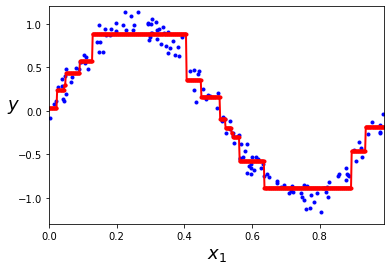

In [19]:
# Fitting Decision Tree with max depth 4
regressor = DecisionTreeRegressor(max_depth = 4)
regressor = regressor.fit(X, y)

plot_regression_predictions(regressor, X, y, [0, 0.99, -1.3, 1.2])

As seen here, the higher the max_depth value, the more accurate the model is.

### E. Overfitting in regression trees

1. Fit another regression tree on the dataset used above, with no restrictions on the regularization hyperparameters of the model. Plot the predicted value in all input space divisions.
2. What do you observe? Do regression trees too have a tendency to overfit if no regularization is applied? 

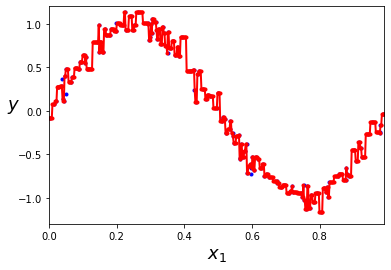

In [20]:
# Fitting Decision Tree with no restictions
regressor = DecisionTreeRegressor()
regressor = regressor.fit(X, y)

plot_regression_predictions(regressor, X, y, [0, 0.99, -1.3, 1.2])

The model is clearly overfitting the data as it is trying to capture every single data point. This is one of the main problems of decision trees which in general have a tendency to overfit the data.

### F. Fine-tuning a decision tree 

1. Generate a moons dataset using make_moons (n_samples=$10000$, noise=$0.5$). Random seed = 42 
2. Split it into a training set and a test set. 
3. Use grid search with cross-validation (with the help of GridSearchCV) to find good hyperparameter values for max_leaf_nodes and min_samples_split. Try values ranging from $2$ to $35$ for max_leaf_nodes and $2$ to $10$ for min_samples_split. Report the optimal hyperparameter values.
4. Train the decision tree classifier on the full training set using these optimal hyperparameters, and report your model's performance on the test set.

In [21]:
# Generating Data
X, y = make_moons(n_samples=10000, noise=0.5, random_state=42)

In [22]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X ,y, train_size = 0.75, random_state = 42)

In [23]:
# Applying Grid Search
hyperparameters = {'max_leaf_nodes': list(range(2, 36)), 'min_samples_split': list(range(2, 11))}
classifier = GridSearchCV(DecisionTreeClassifier(), param_grid = hyperparameters)
classifier.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [24]:
# The optimal hyperparameters
optimal_max_leaf_nodes = classifier.best_params_['max_leaf_nodes']
optimal_min_samples_split = classifier.best_params_['min_samples_split']

print("Optimal max_leaf_nodes:",optimal_max_leaf_nodes)
print("Optimal min_samples_split:",optimal_min_samples_split)

Optimal max_leaf_nodes: 11
Optimal min_samples_split: 2


In [25]:
# Fitting Classifier to train dataset using optimal parameters
classifier = DecisionTreeClassifier(max_leaf_nodes = optimal_max_leaf_nodes, min_samples_split = optimal_min_samples_split)
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [26]:
# Reporting the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model is:", accuracy)

Accuracy of the model is: 0.8136


### G. Training the Random Forest model
1. Load the loans dataset and use one-hot encoding for the column 'purpose'
2. Split the data into test and train sets with ratio 70:30 with random seed = 101
3. Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.
4. Predict the class of not.fully.paid for the X_test data
5. Now create a classification report from the results. Do you get anything strange or some sort of warning?

In [27]:
# Loading the data set
loan_df = pd.read_csv('loan_data.csv')

In [28]:
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [29]:
# Applying one hot encoding to column 'purpose'
loan_df = pd.get_dummies(loan_df, prefix=['purpose'])

In [30]:
# Separating x and y
y = loan_df["not.fully.paid"]
X = loan_df.drop(columns = ["not.fully.paid"])

In [31]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X ,y, train_size = 0.70, random_state = 101)

In [32]:
# Fitting Random Forest Classifier to the training data
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# Making Predictions for the test data
y_pred = classifier.predict(X_test)

In [34]:
# Classification results
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)


print("Accuracy is:", accuracy)
print("f1 Score is:", f1)
print("Recall is:", recall)
print("Precision is:", precision)

Accuracy is: 0.8437717466945024
f1 Score is: 0.02178649237472767
Recall is: 0.011286681715575621
Precision is: 0.3125


###### Discussion

As seen here, even though there is an overall high accuracy, the f1 score is very low. (0.06)
<br>
This is primarily due to the recall which is very low. This indicates that the the random forest classifier is predicting most of the cases as 0 for not.fully.paid, because of the high number of such cases